# Data Inspection and PRELES import


In [1]:
# dependencies
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ctypes import *
import math

## import data

     Unnamed: 0       PAR       TAir       VPD    Precip  CO2     fAPAR  \
0             1  0.400359  -9.338249  0.008562  0.698935  380  0.803980   
1             2  0.162619  -3.484460  0.016255  1.599728  380  0.803980   
2             3  0.225394  -1.895542  0.010908  7.000631  380  0.803980   
3             4  0.478545   0.382136  0.014397  0.800024  380  0.803980   
4             5  0.930608  -1.069905  0.029739  2.300352  380  0.803980   
..          ...       ...        ...       ...       ...  ...       ...   
725         726  0.324603 -14.278970  0.009617  1.599651  380  0.809716   
726         727  0.321746 -16.100334  0.008830  0.200481  380  0.809716   
727         728  0.329498 -19.283059  0.006363  0.000135  380  0.809716   
728         729  0.345591 -21.126648  0.006836  0.000000  380  0.809716   
729         730  0.353544 -21.066009  0.006557  0.201608  380  0.809716   

       GPPobs     ETobs  DOY  
0   -0.000529 -0.057037    1  
1    0.100874  0.062593    2  
2    0

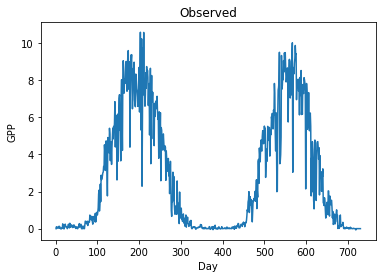

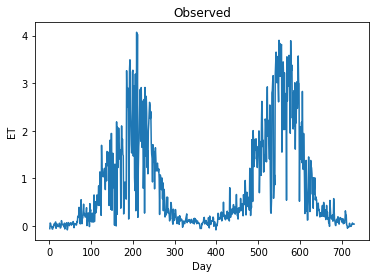

In [2]:
data_path = "C:/Users/Niklas/Desktop/Uni/M.Sc. Environmental Science/Thesis/physics_guided_nn/data/"
data = pd.read_csv(''.join((data_path, "testdat.csv")))
print(data)


plt.plot(data['Unnamed: 0'], data['GPPobs'])
plt.xlabel("Day")
plt.ylabel("GPP")
plt.title("Observed")
plt.show()

plt.plot(data['Unnamed: 0'], data['ETobs'])
plt.xlabel("Day")
plt.ylabel("ET")
plt.title("Observed")
plt.show()

Saving data columns as separate objects for running preles in c 

In [4]:
# INPUTS
PAR = data['PAR']
TAir = data['TAir']
VPD = data['VPD']
Precip = data['Precip']
CO2 = data['CO2']
fAPAR = data['fAPAR']
DOY = data['DOY']

# PARAMETERS
df = [
    413, 0.45, 0.118, 3, 0.7457, 10.93, -3.063,
             17.72, -0.1027, 0.03673, 0.7779, 0.5, -0.364, 0.2715,
             0.8351, 0.07348, 0.9996, 0.4428, 1.2, 0.33, 4.970496,
             0, 0, 160, 0, 0, 0, -999, -999, -999
]


In [3]:
c_path = "C:/Users/Niklas/Desktop/Uni/M.Sc. Environmental Science/Thesis/physics_guided_nn/src/"


## embedding of c function using ctypes

In [4]:
# call function similar to preles.R
def call(par, tair, vpd, precip, co2, fapar, GPPmeas=np.nan, ETmeas=np.nan, SWmeas=np.nan,
        p = [np.nan]*30, doy=[np.nan],
        logflag=0, control=0, pft="evergreen", parmodel=0, lat=np.nan, par0=np.nan):
    
    leng = len(tair)
    if np.isnan(GPPmeas):
        GPPmeas = np.array([-999.]*leng)
    if np.isnan(ETmeas):
        ETmeas = np.array([-999.]*leng)
    if np.isnan(SWmeas):
        SWmeas = np.array([-999.]*leng)
    transp = np.array([-999.]*leng)
    evap = np.array([-999.]*leng)
    fWE = np.array([-999.]*leng)
    
    
    if not control: # default set for conifer sites in scandinavia calibrated.
        defaults = [413.0, ## 1 soildepth
            0.450, ## 2 ThetaFC
            0.118, ## 3 ThetaPWP
            3., ## 4 tauDrainage
            ## GPP_MODEL_PARAMETERS
            0.7457, ## 5 betaGPP
            10.93, ## 6 tauGPP
            -3.063, ## 7 S0GPP
            17.72, ## 8 SmaxGPP
            -0.1027, ## 9 kappaGPP
            0.03673, ## 10 gammaGPP
            0.7779, ## 11 soilthresGPP
            0.500, ## 12 b.CO2, cmCO2
            -0.364, ## 13 x.CO2, ckappaCO2
            ## EVAPOTRANSPIRATION_PARAMETERS
            0.2715, ## 14 betaET
            0.8351, ## 15 kappaET
            0.07348, ## 16 chiET
            0.9996, ## 17 soilthresET
            0.4428, ## 18 nu ET
            ## SNOW_RAIN_PARAMETERS
            1.2, ## 19 Meltcoef
            0.33, ## 20 I_0
            4.970496, ## 21 CWmax, i.e. max canopy water
            0., ## 22 SnowThreshold, 
            0., ## 23 T_0, 
            160., ## 24 SWinit, ## START INITIALISATION PARAMETERS 
            0., ## 25 CWinit, ## Canopy water
            0., ## 26 SOGinit, ## Snow on Ground 
            20., ## 27 Sinit ##CWmax
            -999., ## t0 fPheno_start_date_Tsum_accumulation; conif -999, for birch 57
            -999., ## tcrit, fPheno_start_date_Tsum_Tthreshold, 1.5 birch
            -999. ##tsumcrit, fPheno_budburst_Tsum, 134 birch] 
            ]
    if control: # peltoniemi et al. 2015 Boreal Env. Res. for Hyytiala
        defaults = [413.0, 
            0.450, 0.118, 3., 0.748464, 12.74915, -3.566967, 18.4513, -0.136732,
            0.033942, 0.448975, 0.500, -0.364, 0.33271, 0.857291, 0.041781,
            0.474173, 0.278332, 1.5, 0.33, 4.824704, 0., 0., 180., 0., 0., 10.,
            -999., -999., -999.]
    
   
    if np.sum(np.isnan(p)) > 0:
        idx = [i for i,x in enumerate(p) if np.isnan(x)]
        for i in idx:
            p[i] = defaults[i]

    if pft != "evergreen":
        if len(doy) == 1:
            if np.isnan(doy) or np.sum(np.isnan(p[27:30])) > 0:
                return
        else:
            nn = [n for n in doy if n == np.nan]
            if len(nn) >= 1 or np.sum(np.isnan(p[27:30])) > 0:
                return
    
    if pft == "evergreen":
        if np.sum(np.isnan(p[27:30])):
            print("Phenology parameters given, but not implemented in the model for conifers.")
        p[27] = -999.
    
    if pft == "evergreen":
        if len(doy) == 1 and np.isnan(doy):            
            doy = list(range(1,366))*math.ceil(leng/365)
            doy = doy[0:(leng + 1)]
            doy = [int(d) for d in doy]
        elif len(doy) > 1 and len([n for n in doy if n == np.nan]) > 0:
            doy = list(range(1,366))*math.ceil(leng/365)
            doy = doy[0:(leng + 1)]
            doy = [int(d) for d in doy]
    
   
    # Set Parameters
    p1 = np.array(p[0]) 
    p2 = np.array(p[1]) 
    p3 = np.array(p[2])
    p4 = np.array(p[3])
    p5 = np.array(p[4])
    p6 = np.array(p[5])
    p7 = np.array(p[6]) 
    p8 = np.array(p[7])
    p9 = np.array(p[8])
    p10 = np.array(p[9])
    p11 = np.array(p[10])
    p12 = np.array(p[11])
    p13 = np.array(p[12])
    p14 = np.array(p[13])
    p15 = np.array(p[14])
    p16 = np.array(p[15])
    p17 = np.array(p[16])
    p18 = np.array(p[17])
    p19 = np.array(p[18])
    p20 = np.array(p[19])
    p21 = np.array(p[20])
    p22 = np.array(p[21])
    p23 = np.array(p[22])
    p24 = np.array(p[23])
    p25 = np.array(p[24])
    p26 = np.array(p[25])
    p27 = np.array(p[26])
    p28 = np.array(p[27])
    p29 = np.array(p[28])
    p30 = np.array(p[29])
    
    control = np.array(control, dtype=np.intc)
    logflag = np.array(logflag, dtype=np.intc)
    NofDays = np.array(leng, dtype=np.intc)
    day = np.array(doy, dtype=np.intc)
    # Outputs
    GPP = np.empty(leng, np.double)
    ET = np.empty(leng, np.double)
    SW = np.empty(leng, np.double)
    SOG = np.empty(leng, np.double)
    fS = np.empty(leng, np.double)
    fD = np.empty(leng, np.double)
    fW = np.empty(leng, np.double)
    fE = np.empty(leng, np.double)
    Throughfall = np.empty(leng, np.double)
    Interception = np.empty(leng, np.double)
    Snowmelt = np.empty(leng, np.double)
    Drainage = np.empty(leng, np.double)
    Canopywater = np.empty(leng, np.double)
    S = np.empty(leng, np.double)
    
    
    # Load C library 
    lib = CDLL(''.join((c_path, 'call_preles.so')))
    preles = lib.call_preles
    # define types of required call_preles().c inputs
    preles.argtypes = [np.ctypeslib.ndpointer(dtype=np.double)]*9 + [np.ctypeslib.ndpointer(dtype=np.double)]*14 +\
                        [np.ctypeslib.ndpointer(dtype=np.double)]*30 + [np.ctypeslib.ndpointer(dtype=np.intc)]*4 +\
                        [np.ctypeslib.ndpointer(dtype=np.double)]*3
    # outputs
    preles.restype = c_void_p
    
    preles(
        # inputs
        par, tair, vpd, precip, co2, fapar, GPPmeas, ETmeas, SWmeas,
        # Outputs
        GPP, ET, SW, SOG, fS, fD, fW, fE, Throughfall, 
        Interception, Snowmelt, Drainage, Canopywater, S,
        # Parameters
        p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, p13, p14, p15,
        p16, p17, p18, p19, p20, p21, p22, p23, p24, p25, p26, p27, p28, p29, p30,
        
        control, logflag, NofDays,day,
        transp,
        evap,
        fWE)
    
    
    
    return GPP, ET

In [27]:
GPP, ET = call(par = np.array(PAR), 
     tair = np.array(TAir), 
     vpd = np.array(VPD), 
     precip = np.array(Precip), 
     co2 = np.array(CO2, dtype = np.double), 
     fapar = np.array(fAPAR, dtype = np.double),
     p = [float(pa) for pa in df])


In [5]:
R = pd.read_csv(''.join((data_path,'resultsR.csv')))

In [6]:
R

,Unnamed: 0,GPP,ET,SW,SOG,fS,fD,fW,fE,Throughfall,Interception,Snowmelt,Drainage,Canopywater,S
0,1,0.029458,0.004998,160.000000,0.693937,0.124641,0.999121,1.0,0.811798,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-0.854369
1,2,0.010746,0.002149,160.000000,2.291516,0.111061,0.998332,1.0,0.811798,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-1.094999
2,3,0.014314,0.002836,160.000000,9.289311,0.106928,0.998880,1.0,0.811798,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-1.168242
3,4,0.032357,0.007196,160.975577,8.830748,0.114933,0.998522,1.0,1.000000,0.517014,0.283009,0.458563,0.000000e+00,0.275813,-1.026396
4,5,0.061694,0.014590,160.975577,11.131100,0.114708,0.996950,1.0,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.261223,-1.030376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,0.000000,0.000932,185.850000,48.116566,0.000000,0.999013,1.0,1.000000,0.000000,0.000000,0.000000,1.616835e-08,2.430669,-9.720770
726,727,0.000000,0.000830,185.850000,48.317047,0.000000,0.999094,1.0,1.000000,0.000000,0.000000,0.000000,1.077890e-08,2.429839,-10.304444
727,728,0.000000,0.000697,185.850000,48.317182,0.000000,0.999347,1.0,1.000000,0.000000,0.000000,0.000000,7.185937e-09,2.429143,-11.125910
728,729,0.000000,0.000647,185.850000,48.317182,0.000000,0.999298,1.0,1.000000,0.000000,0.000000,0.000000,4.790621e-09,2.428495,-12.040890


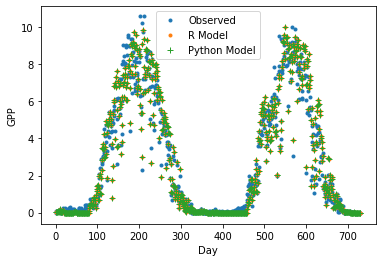

In [33]:
%matplotlib inline 
# change qt for extra window
plt.figure()
plt.plot(data['Unnamed: 0'], data['GPPobs'], '.', label = 'Observed')
plt.plot(data['Unnamed: 0'], R['GPP'], '.',label = 'R Model')
plt.plot(data['Unnamed: 0'], GPP, '+',label = 'Python Model')
plt.xlabel("Day")
plt.ylabel("GPP")
plt.legend()
plt.show()

In [35]:
%matplotlib qt
plt.figure()
plt.plot(data['Unnamed: 0'], data['ETobs'], '.',label = 'Observed')
plt.plot(data['Unnamed: 0'], R['ET'], '.',label = 'R Model')
plt.plot(data['Unnamed: 0'], ET, '+',label = 'Python Model')
plt.xlabel("Day")
plt.ylabel("ET")
plt.legend()
plt.show()

## Calibration

In [18]:
defaults = [float(pa) for pa in df]
lower = [d - abs(0.1*d) for d in defaults]
upper = [d + abs(0.1*d) for d in defaults]

def sensitivityTarget(b, l, u):
    results = []
    parms = [b, l, u]
    for i in range(0,3):
        pred, ET = call(par = np.array(PAR), tair = np.array(TAir), vpd = np.array(VPD), precip = np.array(Precip),
                    co2 = np.array(CO2, dtype = np.double), fapar = np.array(fAPAR, dtype = np.double),
                    p = parms[i])
        results.append(np.mean(pred))
    return results


In [19]:
sensdata = {
    'best': [],
    'lower': [],
    'upper': []
}

r = sensitivityTarget(defaults, lower, upper)
keys = ['best', 'lower', 'upper']
for i in range(0, 3):
    sensdata.update({keys[i]: r[i]})
sensdata

{'best': 2.8932720990393834,
 'lower': 2.9523560019253554,
 'upper': 2.721471781617559}

In [20]:
sensdata['upperc'] = round(sensdata['upper']/sensdata['best']*100-100, 2)
sensdata['loperc'] = round(sensdata['lower']/sensdata['best']*100-100, 2)
sensdata

{'best': 2.8932720990393834,
 'lower': 2.9523560019253554,
 'upper': 2.721471781617559,
 'upperc': -5.94,
 'loperc': 2.04}

In [21]:
op_plot = {}
for i in range(0, len(defaults)):
    seqtemp = []
    seqtemp = np.linspace(min([defaults[i], lower[i], upper[i]]), max([defaults[i], lower[i], upper[i]]), 20)
    results = []
    for j in range(0, len(seqtemp)):
        parameters = defaults
        parameters[i] = seqtemp[j]
        preds, ET = call(par = np.array(PAR), tair = np.array(TAir), vpd = np.array(VPD), precip = np.array(Precip),
                    co2 = np.array(CO2, dtype = np.double), fapar = np.array(fAPAR, dtype = np.double),
                    p = parameters)
        results.append(np.mean(preds))
    op_plot.update({i: [[seqtemp], [results]]})
        

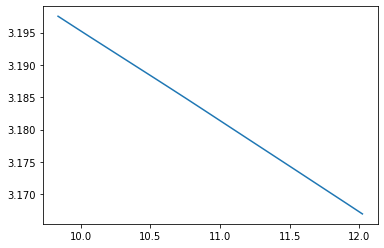

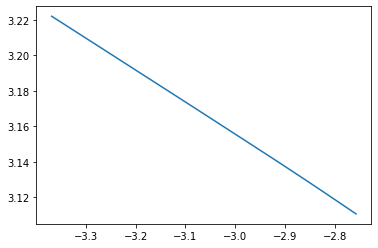

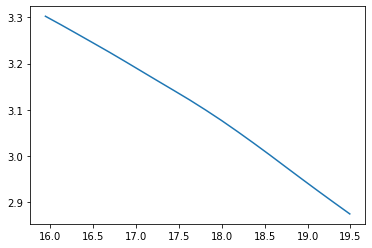

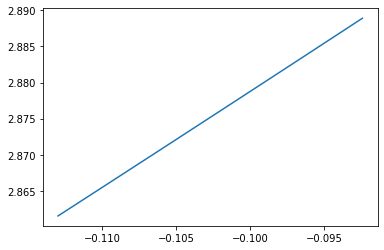

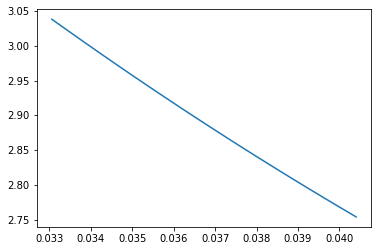

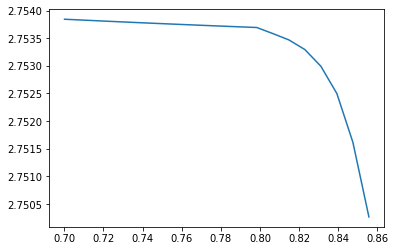

In [22]:
%matplotlib inline
for i in range(5,11):
    plt.figure(i)
    plt.plot(op_plot[i][0][0], op_plot[i][1][0])
    plt.show()